In [1]:
%matplotlib inline

import os
import glob

import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.stats as ss
from sklearn.metrics import auc, precision_recall_curve, roc_curve

In [2]:
file_tree = {
        "DaG":
        {
            "coco_score": "../../../disease_gene/disease_associates_gene/literature_models/coco_score/output/dg_edge_prediction_cocoscore.tsv",
            "our_model": "../../../disease_gene/disease_associates_gene/edge_prediction_experiment/output/combined_predicted_dag_sentences.tsv.xz",
            "labels": "../../../disease_gene/disease_associates_gene/dataset_statistics/output/all_dag_candidates.tsv.xz",
            "split": 2
        },
        "CtD":
        {
            "coco_score": "../../../compound_disease/compound_treats_disease/literature_models/coco_score/output/cd_edge_prediction_cocoscore.tsv",
            "our_model": "../../../compound_disease/compound_treats_disease/edge_prediction_experiment/output/combined_predicted_ctd_sentences.tsv.xz",
            "labels": "../../../compound_disease/compound_treats_disease/dataset_statistics/output/all_ctd_candidates.tsv.xz",
            "split": 11
        },
        "CbG":
        {
            "coco_score": "../../../compound_gene/compound_binds_gene/literature_models/coco_score/output/cg_edge_prediction_cocoscore.tsv",
            "our_model": "../../../compound_gene/compound_binds_gene/edge_prediction_experiment/output/combined_predicted_cbg_sentences.tsv.xz",
            "labels": "../../../compound_gene/compound_binds_gene/dataset_statistics/output/all_cbg_candidates.tsv.xz",
            "split": 8

        },
        "GiG":
        {
            "coco_score": "../../../gene_gene/gene_interacts_gene/literature_models/coco_score/output/gg_edge_prediction_cocoscore.tsv",
            "our_model": "../../../gene_gene/gene_interacts_gene/edge_prediction_experiment/output/combined_predicted_gig_sentences.tsv.xz",
            "labels": "../../../gene_gene/gene_interacts_gene/dataset_statistics/output/all_gig_candidates.tsv.xz",
            "split": 5
        }
    }

In [3]:
performance_map = {}
for rel in file_tree:

    id_keys = (
            ["doid_id", "entrez_gene_id"] if rel == "DaG" else
            ["doid_id", "drugbank_id"] if rel == "CtD" else
            ["drugbank_id", "entrez_gene_id"] if rel == "CbG" else
            ["gene1_id", "gene2_id"]
        )

    # Need to combine marginals together for our model 
    # AGG function
    performance_map[rel] = (
        pd.read_csv(file_tree[rel]['coco_score'], sep="\t")
        .rename(index=str, columns={"final_score": "coco_score"})
        .drop("hetionet", axis=1)
        .merge(
            pd.read_csv(file_tree[rel]['our_model'], sep="\t")
            .groupby(id_keys)
            .agg({
                "pred": 'max',
                "hetionet":'first',
                "split": 'first'
            })
            .reset_index()
            [id_keys +["hetionet", "pred", "split"]],
            on=id_keys
        )
        .query(f"split=={file_tree[rel]['split']}")
    )

In [4]:
data = []
for rel in performance_map:
    precision, recall, _ = precision_recall_curve(performance_map[rel]['hetionet'], performance_map[rel]['pred'])
    fpr, tpr, threshold = roc_curve(performance_map[rel]['hetionet'], performance_map[rel]['pred'])
    data.append({'aupr': auc(recall, precision), 'auroc': auc(fpr, tpr), 'relation': rel, 'model':'our_model'})

    precision, recall, _ = precision_recall_curve(performance_map[rel]['hetionet'], performance_map[rel]['coco_score'])
    fpr, tpr, threshold = roc_curve(performance_map[rel]['hetionet'], performance_map[rel]['coco_score'])
    data.append({'aupr': auc(recall, precision), 'auroc': auc(fpr, tpr), 'relation': rel, 'model':'coco_score'})
    
results_df = pd.DataFrame.from_records(data)
results_df

,aupr,auroc,model,relation
0,0.227284,0.756030,our_model,DaG
1,0.434265,0.814286,coco_score,DaG
2,0.317191,0.946176,our_model,CtD
3,0.493224,0.957707,coco_score,CtD
4,0.083694,0.749442,our_model,CbG
5,0.196543,0.818928,coco_score,CbG
6,0.069524,0.697439,our_model,GiG
7,0.116987,0.771484,coco_score,GiG


In [5]:
color_map = {
    "our_model": mcolors.to_hex(pd.np.array([31,120,180, 255])/255),
    "coco_score": mcolors.to_hex(pd.np.array([178,223,138, 255])/255)
}

/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


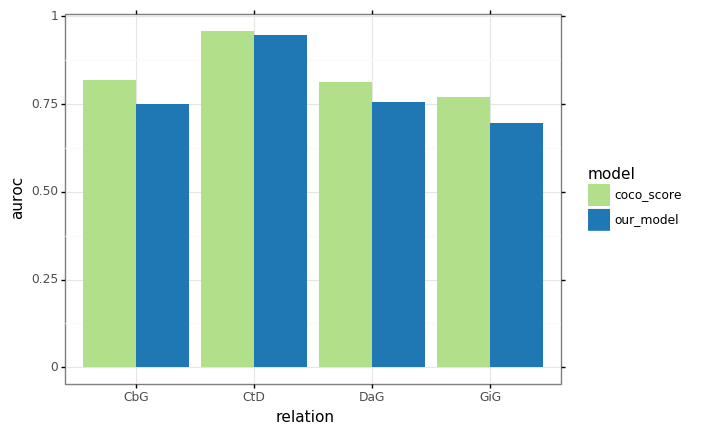

<ggplot: (8768750804193)>


/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../coco_score_auroc.png
  warn('Filename: {}'.format(filename))
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages

In [6]:
g = (
    p9.ggplot(results_df, p9.aes(x="relation", y="auroc", fill="model")) +
    p9.geom_col(position="dodge")  + 
    p9.scale_fill_manual(values={
        "our_model":color_map["our_model"],
        "coco_score":color_map["coco_score"]
    }) +
    p9.guides(color=p9.guide_legend(title="Models")) + 
    p9.theme_bw()
)
print(g)
g.save(filename="../coco_score_auroc.png", dpi=300)